In [2]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
hostnames = []
dataset = []
df = None

In [4]:
def set_hostnames(number_of_hosts):
    os = ['L']*4 + ['S']*3 + ['A']*2 + ['H']
    environment = ['D']*10 + ['I']*10 + ['T']*25 + ['S']*25 + ['P']*30
    country = ['NOR']*6 + ['FRA']*9 + ['ITA']*16 + ['ESP']*16 + ['DEU']*23 + ['IRL']*30
    group_alpha = []
    
    for i in range(number_of_hosts):
        hostname = random.choice(os) + random.choice(environment) + random.choice(country)
        group_alpha.append(hostname)
        hostname += str(group_alpha.count(hostname)).zfill(3)
        hostnames.append(hostname)

In [5]:
def get_os(hostname):
    os_mapping = {'L': 'Linux', 'S': 'Solaris', 'A': 'AIX', 'H': 'HP-UX'}
    return os_mapping.get(hostname[0], 'Unknown')

In [6]:
def get_environment(hostname):
    env_mapping = {'D': 'Development', 'I': 'Integration', 'T': 'Testing', 'S': 'Staging', 'P': 'Production'}
    return env_mapping.get(hostname[1], 'Unknown')

In [7]:
def get_country(hostname):
    country_mapping = {'NOR': 'Norway', 'FRA': 'France', 'ITA': 'Italy', 'ESP': 'Spain', 'DEU': 'Germany', 'IRL': 'Ireland'}
    return country_mapping.get(hostname[2:5], 'Unknown')

In [8]:
def set_dataframe(count):
    global df
    set_hostnames(count)
    for hostname in hostnames:
        dataset.append(
            {
                'hostname': hostname,
                'os': get_os(hostname),
                'environment': get_environment(hostname),
                'country': get_country(hostname),
                'node': int(hostname[-3:])
            }
        )
    df = pd.DataFrame(dataset)

In [9]:
set_dataframe(1500)
df

,hostname,os,environment,country,node
0,STNOR001,Solaris,Testing,Norway,1
1,SPDEU001,Solaris,Production,Germany,1
2,ATDEU001,AIX,Testing,Germany,1
3,ATITA001,AIX,Testing,Italy,1
4,HIIRL001,HP-UX,Integration,Ireland,1
...,...,...,...,...,...
1495,LTESP027,Linux,Testing,Spain,27
1496,SPFRA008,Solaris,Production,France,8
1497,SPIRL052,Solaris,Production,Ireland,52
1498,AIESP006,AIX,Integration,Spain,6


In [10]:
df.to_csv('hosts.csv', header=True, index=False)
hosts_df = pd.read_csv('hosts.csv')
hosts_df

,hostname,os,environment,country,node
0,STNOR001,Solaris,Testing,Norway,1
1,SPDEU001,Solaris,Production,Germany,1
2,ATDEU001,AIX,Testing,Germany,1
3,ATITA001,AIX,Testing,Italy,1
4,HIIRL001,HP-UX,Integration,Ireland,1
...,...,...,...,...,...
1495,LTESP027,Linux,Testing,Spain,27
1496,SPFRA008,Solaris,Production,France,8
1497,SPIRL052,Solaris,Production,Ireland,52
1498,AIESP006,AIX,Integration,Spain,6


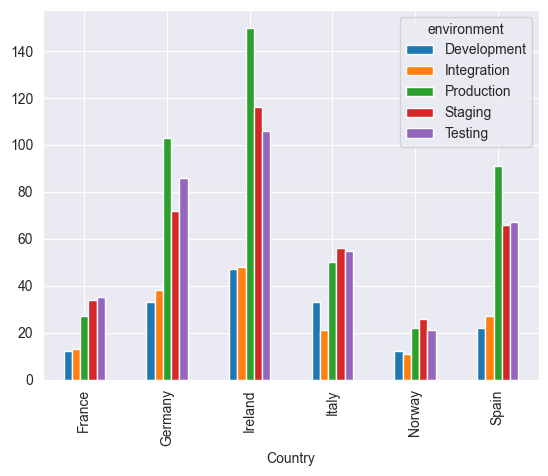

In [11]:
grouped_data = df.groupby(['country', 'environment']).size().unstack()
grouped_data.plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('')
plt.show()

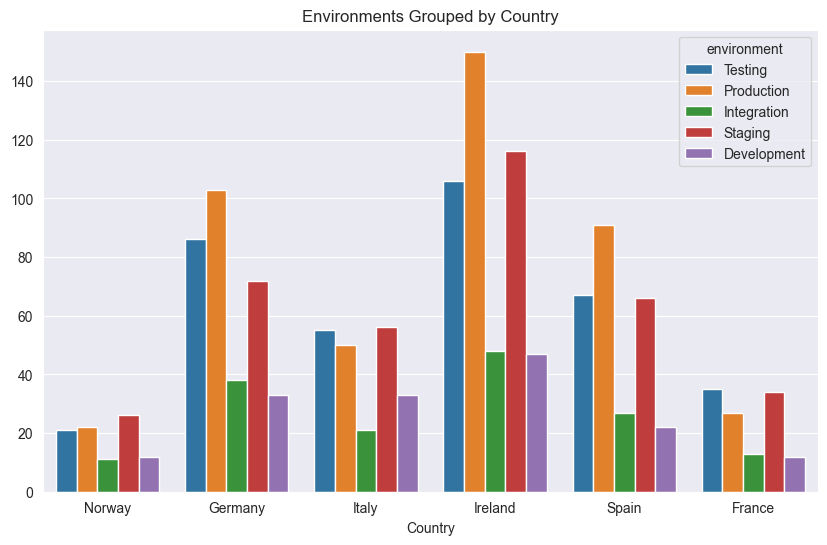

In [12]:
# Otra forma de hacerlo con seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='country', hue='environment', data=df)
plt.title('Environments Grouped by Country')
plt.xlabel('Country')
plt.ylabel('')
plt.show()

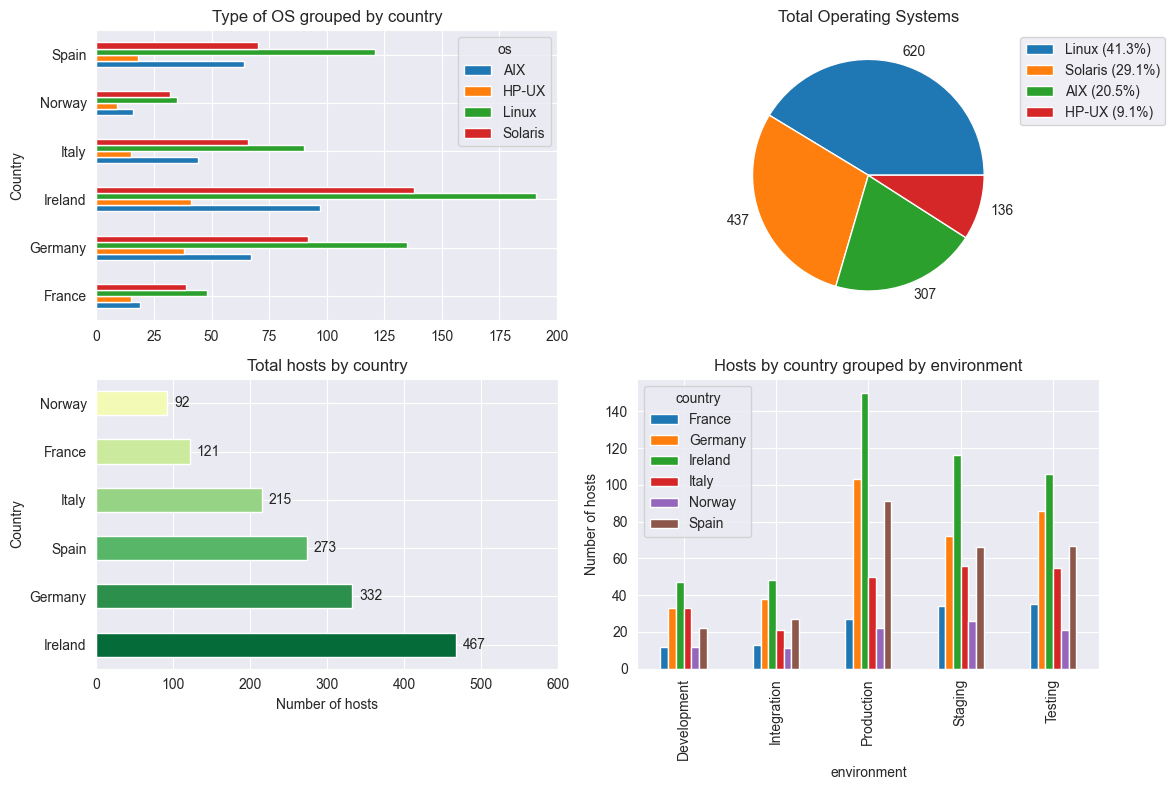

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1
os_by_country = df.groupby(['country', 'os']).size().unstack()
os_by_country.plot(kind='barh', ax=axs[0, 0])
axs[0, 0].set_title('Type of OS grouped by country')
axs[0, 0].set_ylabel('Country')

# Plot 2
total_os = df['os'].value_counts()
total_os.plot(kind='pie', title='Total Operating Systems', ax=axs[0, 1], labels=total_os)
legend = [f'{os} ({percentage:.1f}%)' for os, percentage in zip(total_os.index, total_os / len(hosts_df)*100)]
axs[0, 1].legend(labels=legend, bbox_to_anchor=(1, 1))
axs[0, 1].set_ylabel('')

# Plot 3
total_hosts_by_country = df['country'].value_counts()
colors = sns.color_palette("YlGn_r")
ax3 = total_hosts_by_country.plot(kind='barh', color=colors, ax=axs[1, 0])
axs[1, 0].set_title('Total hosts by country')
axs[1, 0].set_xlabel('Number of hosts')
axs[1, 0].set_ylabel('Country')
axs[1, 0].set_xlim(0, 600)

for p in ax3.patches:
    width = p.get_width()
    ax3.annotate(f'{width}', (width, p.get_y() + p.get_height() / 2),
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Plot 4
hosts_by_country_env = df.groupby(['environment', 'country']).size().unstack()
hosts_by_country_env.plot(kind='bar', ax=axs[1, 1])
axs[1, 1].set_title('Hosts by country grouped by environment')
axs[1, 1].set_ylabel('Number of hosts')

fig.tight_layout()
plt.show()